Mean F-statistic: 185.482
Median F-statistic: 86.412
Standard deviation: 277.890
Percentage of F-stats < 1: 0.0%

F-statistic for true model: 2267.211


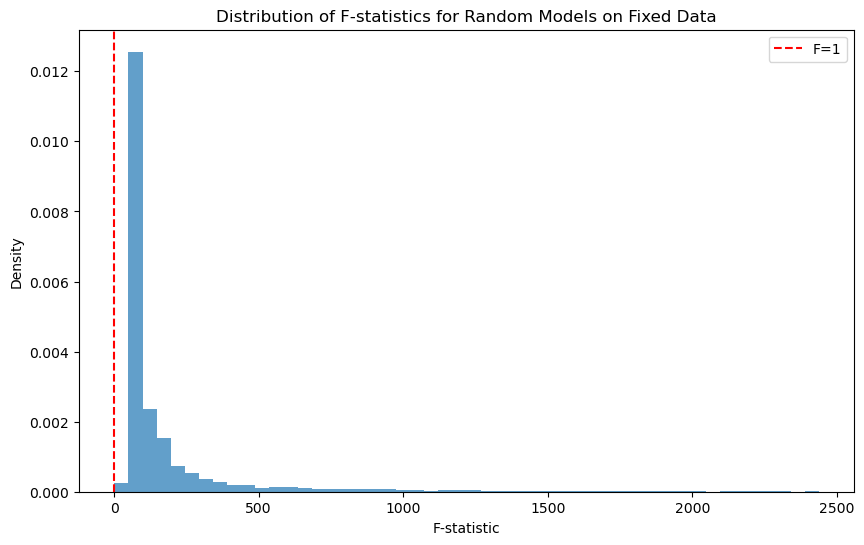

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate one fixed dataset
n = 100
x = np.linspace(0, 10, n)  # Fixed X values
true_beta0, true_beta1 = 2, 3  # True parameters
y = true_beta0 + true_beta1 * x + np.random.normal(0, 2, n)  # Fixed Y values

def calculate_f_stat(y_pred, y_true):
    y_mean = np.mean(y_true)
    
    # Calculate sums of squares
    ss_reg = np.sum((y_pred - y_mean)**2)
    ss_err = np.sum((y_true - y_pred)**2)
    
    # Calculate mean squares
    ms_reg = ss_reg / 1  # df_reg = 1
    ms_err = ss_err / (n - 2)  # df_err = n - 2
    
    return ms_reg / ms_err if ms_err != 0 else 0

# Simulate random models
n_simulations = 10000
f_stats = []

for _ in range(n_simulations):
    # Generate random coefficients for the model
    random_beta0 = np.random.normal(0, 5)  # Random intercept
    random_beta1 = np.random.normal(0, 5)  # Random slope
    
    # Calculate predictions using random model
    y_pred = random_beta0 + random_beta1 * x
    
    # Calculate F-statistic
    f_stat = calculate_f_stat(y_pred, y)
    f_stats.append(f_stat)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(f_stats, bins=50, density=True, alpha=0.7)
plt.axvline(x=1, color='r', linestyle='--', label='F=1')

plt.title('Distribution of F-statistics for Random Models on Fixed Data')
plt.xlabel('F-statistic')
plt.ylabel('Density')
plt.legend()

# Calculate summary statistics
mean_f = np.mean(f_stats)
median_f = np.median(f_stats)
std_f = np.std(f_stats)

print(f"Mean F-statistic: {mean_f:.3f}")
print(f"Median F-statistic: {median_f:.3f}")
print(f"Standard deviation: {std_f:.3f}")
print(f"Percentage of F-stats < 1: {(np.array(f_stats) < 1).mean() * 100:.1f}%")

# Calculate F-stat for the true model
y_pred_true = true_beta0 + true_beta1 * x
f_stat_true = calculate_f_stat(y_pred_true, y)
print(f"\nF-statistic for true model: {f_stat_true:.3f}")